In [1]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import insertion_sort as insert
import random
from timeit import Timer

In [2]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [28]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100, 500, 1000, 2000, 3000] #, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort, insert.insertion_sort]

resultados = {}

In [29]:
conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(1)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

In [38]:
## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys():
    print ('Conjunto de datos' + str(i)) 
    for j in resultados[i].keys():
        print ('Cantidad de elementos: ' + str(j))
        print ('heap sort:' + str(resultados[i][j][0]))
        print ('selection sort:' + str(resultados[i][j][1]))
        print ('merge sort:' + str(resultados[i][j][2]))
        print ('quick sort:' + str(resultados[i][j][3]))
        print ('insertion sort:' + str(resultados[i][j][4]))
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': resultados[i][j][0],
                'selectionsort' : resultados[i][j][1],
                'mergesort': resultados[i][j][2],
                'quicksort': resultados[i][j][3],
                'insertion': resultados[i][j][4]
            }
        else:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5,
                'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5,
                'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5,
                'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5,
                'insertion': (tiempos_medio_algoritmo_rango[j]['insertion'] + resultados[i][j][4])*.5
            }

Conjunto de datos0
Cantidad de elementos: 50
heap sort:0.0007456680000359484
selection sort:0.00018326899999010493
merge sort:0.00026015100002041436
quick sort:0.00012113899992982624
insertion sort:0.00011048399983337731
Cantidad de elementos: 100
heap sort:0.0008215370003199496
selection sort:0.0004983690000699426
merge sort:0.0005294299999150098
quick sort:0.00027680399989549187
insertion sort:0.0004018590002488054
Cantidad de elementos: 500
heap sort:0.0052607480001825024
selection sort:0.012604545999693073
merge sort:0.0031004530001155217
quick sort:0.001678640000136511
insertion sort:0.01069420399971932
Cantidad de elementos: 1000
heap sort:0.011841646999982913
selection sort:0.04980992900027559
merge sort:0.006625151000207552
quick sort:0.0034289210002498294
insertion sort:0.042439732999810076
Cantidad de elementos: 2000
heap sort:0.02622206299975005
selection sort:0.18272202100024515
merge sort:0.012600734999978158
quick sort:0.0076451690001704264
insertion sort:0.17200128800004

In [39]:
## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
    print ('\t insertion sort: ' + str(tiempos_medio_algoritmo_rango[t]['insertion']))

tiempo medio con 50 iteraciones: 
	 heapsort: 0.00034779588481015367
	 selectionsort: 0.00014609761517903053
	 mergesort: 0.0002354401620250357
	 quicksort: 0.00012343893938204786
	 insertion sort: 9.257180675081855e-05
tiempo medio con 100 iteraciones: 
	 heapsort: 0.0007517049354683891
	 selectionsort: 0.0004578596269189106
	 mergesort: 0.00048603948643588524
	 quicksort: 0.00023930887704004533
	 insertion sort: 0.0003558228475943892
tiempo medio con 500 iteraciones: 
	 heapsort: 0.005059077326087014
	 selectionsort: 0.011639820628812636
	 mergesort: 0.002814915294861997
	 quicksort: 0.0014548931133040455
	 insertion sort: 0.00967315055449891
tiempo medio con 1000 iteraciones: 
	 heapsort: 0.011212659078113418
	 selectionsort: 0.045860755587886715
	 mergesort: 0.0058321133378553824
	 quicksort: 0.003378768048993841
	 insertion sort: 0.04057374416801629
tiempo medio con 2000 iteraciones: 
	 heapsort: 0.02426226182027591
	 selectionsort: 0.18398296358209087
	 mergesort: 0.0122888770079

heapsort
selectionsort
mergesort
quicksort
insertion


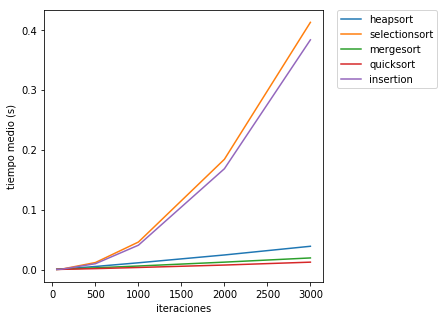

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    #print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
plt.figure(figsize=(5,5))
for alg in algoritmos_x.keys():
    print(alg)
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('iteraciones')   
plt.ylabel('tiempo medio (s)')   
plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()